# Virtual Youtubers Data Analysis

ygy

Source Data = https://www.kaggle.com/datasets/uetchy/vtuber-livechat-elements

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings as wrn
wrn.filterwarnings('ignore', category = DeprecationWarning) 
wrn.filterwarnings('ignore', category = FutureWarning) 
wrn.filterwarnings('ignore', category = UserWarning)
wrn.filterwarnings('ignore', category = RuntimeWarning)
%matplotlib inline
from src.utils import create_plot_bar, create_scatter_plot, reformat_large_tick_values, label_point
pd.set_option('display.float_format', lambda x: '%.3f' % x)
sns.set_theme(style="darkgrid")

In [6]:
!pwd

/mnt/d/Open Project/vtuber


In [4]:
DATA_PATH = 'data/yt_superchat/'

In [5]:
df = pd.read_csv(DATA_PATH + 'channels.csv')

In [6]:
df.head()

,channelId,name,englishName,affiliation,group,subscriptionCount,videoCount,photo
0,UCJFZiqLMntJufDCHc6bQixg,hololive ホロライブ - VTuber Group,Hololive VTuber Group,Hololive,NaN,1790000,509,https://yt3.ggpht.com/ytc/AMLnZu-FamPA8ofQShmC...
1,UCfrWoRGlawPQDQxxeIDRP0Q,hololive Indonesia,Hololive Indonesia,Hololive,NaN,339000,69,https://yt3.ggpht.com/ytc/AMLnZu8aac2EJS9DCkeC...
2,UCotXwY6s8pWmuWd_snKYjhg,hololive English,Hololive English,Hololive,NaN,516000,34,https://yt3.ggpht.com/ytc/AMLnZu8qlq9NWNSS3MkV...
3,UCWsfcksUUpoEvhia0_ut0bA,holostars ホロスターズ - VTuber Group,Holostars Official,Hololive,NaN,193000,150,https://yt3.ggpht.com/5Jn_OHkOZhZssXXwWopUQZVw...
4,UCp6993wxpyDPHUpavwDFqgg,SoraCh. ときのそらチャンネル,Tokino Sora,Hololive,NaN,1000000,667,https://yt3.ggpht.com/ytc/AMLnZu-Uc3gukr4oNSY0...


In [7]:
df['affiliation'].value_counts()

Independents            470
Nijisanji               207
Hololive                 92
Twitch Independents      60
774inc                   31
ReAcT                    30
MAHA5                    20
Emoechi                  19
KAMITSUBAKI              18
WACTOR                   18
Masquerade               17
Phase Connect            17
.LIVE                    16
ProPro                   16
VSpo                     16
Pixela Project           15
VShojo                   15
PRISM                    14
Nori Pro                 13
Hoshimeguri Gakuen       13
Tsunderia                10
Production Kawaii        10
Riot Music                9
Atelier Live              9
GuildCQ                   9
Aetheria                  9
Aogiri Highschool         8
Neo-Porte                 8
Shinsougumi               8
VOMS                      8
SquareLive                8
VOICE-ORE                 7
Yume Reality              7
H.Live                    7
Pink Punk Pro             7
ViViD               

In [8]:
df[df['affiliation'] == "Hololive"].sort_values(by="subscriptionCount", ascending=False)

,channelId,name,englishName,affiliation,group,subscriptionCount,videoCount,photo
338,UCoSrY_IQQVpmIRZ9Xf-y93g,Gawr Gura Ch. hololive-EN,Gawr Gura,Hololive,English (Myth),4100000,364,https://yt3.ggpht.com/uMUat6yJL2_Sk6Wg2-yn0fSI...
336,UCL_qhgtOy0dy1Agp8vkySQg,Mori Calliope Ch. hololive-EN,Mori Calliope,Hololive,English (Myth),2110000,512,https://yt3.ggpht.com/8B_T08sx8R7XVi5Mwx_l9sjQ...
319,UCCzUftO8KOVkV4wQG1vkUvg,Marine Ch. 宝鐘マリン,Houshou Marine,Hololive,3rd Generation,2020000,762,https://yt3.ggpht.com/ytc/AMLnZu9VkixedCXsYS2B...
318,UC1DCedRgGHBdm81E1llLhOQ,Pekora Ch. 兎田ぺこら,Usada Pekora,Hololive,3rd Generation,1990000,1013,https://yt3.ggpht.com/ytc/AMLnZu9QrCPT5A0zE49E...
298,UCdn5BQ06XqgXoAxIhbqw5Rg,フブキCh。白上フブキ,Shirakami Fubuki,Hololive,1st Generation,1920000,1595,https://yt3.ggpht.com/ytc/AMLnZu94ON3OFLpRg0WS...
...,...,...,...,...,...,...,...,...
870,UCJxZpzx4wHzEYD-eCiZPikg,HOLOSTARS English,HOLOSTARS English,Hololive,NaN,54200,7,https://yt3.ggpht.com/jvGFuTmqlv5udorr8TGYsllU...
339,UCq4ky2drohLT7W0DmDEw1dQ,Takanashi Kiara SubCh.,Takanashi Kiara SubCh.,Hololive,English (Myth),42000,0,https://yt3.ggpht.com/qrJ20z3aXVOCUkMuYe6Cl5Dg...
404,UCsehvfwaWF6nWuFnXI0AqZQ,Kaoru Ch.月下カオル,Tsukishita Kaoru,Hololive,INACTIVE,39800,0,https://yt3.ggpht.com/ytc/AKedOLQrY9o5NRMtXpH3...
376,UCnVbtCwr-5LXxUlGxsgD7sQ,Midnight Grand Orchestra,Midnight Grand Orchestra,Hololive,Misc,30400,8,https://yt3.ggpht.com/Mr6wZI50KvTNDykWZEqKAhG4...


### Get Hololive ID data

In [9]:
df[df['group'].str.contains('Indonesia') == True]

,channelId,name,englishName,affiliation,group,subscriptionCount,videoCount,photo
347,UCAoy6rzhSf4ydcYjJw3WoVg,Airani Iofifteen Channel hololive-ID,Airani Iofifteen,Hololive,Indonesia 1st Gen,614000,439,https://yt3.ggpht.com/bF91weVtAIL7Uhnr2HVwtCTL...
348,UCOyYb1c43VlX9rc_lT6NKQw,Ayunda Risu Ch. hololive-ID,Ayunda Risu,Hololive,Indonesia 1st Gen,716000,565,https://yt3.ggpht.com/ytc/AMLnZu_WBKt0fYv-RMko...
349,UCP0BspO_AMEe3aQqqpo89Dg,Moona Hoshinova hololive-ID,Moona Hoshinova,Hololive,Indonesia 1st Gen,1160000,455,https://yt3.ggpht.com/ytc/AMLnZu-RitUGw045SER_...
350,UC727SQYUvx5pDDGQpTICNWg,Anya Melfissa Ch. hololive-ID,Anya Melfissa,Hololive,Indonesia 2nd Gen,533000,371,https://yt3.ggpht.com/ytc/AMLnZu_Kj0ZJ_ImZWqaC...
351,UChgTyjG-pdNvxxhdsXfHQ5Q,Pavolia Reine Ch. hololive-ID,Pavolia Reine,Hololive,Indonesia 2nd Gen,669000,604,https://yt3.ggpht.com/sG7Yb1kCxTEP9ft03E-1Tr2R...
352,UCYz_5n-uDuChHtLo7My1HnQ,Kureiji Ollie Ch. hololive-ID,Kureiji Ollie,Hololive,Indonesia 2nd Gen,1160000,543,https://yt3.ggpht.com/jWxru6sHDDSuKF-gztFg_WSo...
353,UCjLEmnpCNeisMxy134KPwWw,Kobo Kanaeru Ch. hololive-ID,Kobo Kanaeru,Hololive,Indonesia 3rd Gen,1250000,114,https://yt3.ggpht.com/Zi6DMbqTrk8jpNKnJgbw_NxG...
354,UCTvHWSfBZgtxE4sILOaurIQ,Vestia Zeta Ch. hololive-ID,Vestia Zeta,Hololive,Indonesia 3rd Gen,515000,136,https://yt3.ggpht.com/-IdVo-vK7pr0VRjJDdza1-t1...
355,UCZLZ8Jjx_RN2CXloOmgTHVg,Kaela Kovalskia Ch. hololive-ID,Kaela Kovalskia,Hololive,Indonesia 3rd Gen,400000,176,https://yt3.ggpht.com/PxkGgLvMEUgmme35T0VPLR8d...


In [10]:
holo_id = df[df['group'].str.contains('Indonesia') == True]

In [12]:
holo_id

,channelId,name,englishName,affiliation,group,subscriptionCount,videoCount,photo
347,UCAoy6rzhSf4ydcYjJw3WoVg,Airani Iofifteen Channel hololive-ID,Airani Iofifteen,Hololive,Indonesia 1st Gen,614000,439,https://yt3.ggpht.com/bF91weVtAIL7Uhnr2HVwtCTL...
348,UCOyYb1c43VlX9rc_lT6NKQw,Ayunda Risu Ch. hololive-ID,Ayunda Risu,Hololive,Indonesia 1st Gen,716000,565,https://yt3.ggpht.com/ytc/AMLnZu_WBKt0fYv-RMko...
349,UCP0BspO_AMEe3aQqqpo89Dg,Moona Hoshinova hololive-ID,Moona Hoshinova,Hololive,Indonesia 1st Gen,1160000,455,https://yt3.ggpht.com/ytc/AMLnZu-RitUGw045SER_...
350,UC727SQYUvx5pDDGQpTICNWg,Anya Melfissa Ch. hololive-ID,Anya Melfissa,Hololive,Indonesia 2nd Gen,533000,371,https://yt3.ggpht.com/ytc/AMLnZu_Kj0ZJ_ImZWqaC...
351,UChgTyjG-pdNvxxhdsXfHQ5Q,Pavolia Reine Ch. hololive-ID,Pavolia Reine,Hololive,Indonesia 2nd Gen,669000,604,https://yt3.ggpht.com/sG7Yb1kCxTEP9ft03E-1Tr2R...
352,UCYz_5n-uDuChHtLo7My1HnQ,Kureiji Ollie Ch. hololive-ID,Kureiji Ollie,Hololive,Indonesia 2nd Gen,1160000,543,https://yt3.ggpht.com/jWxru6sHDDSuKF-gztFg_WSo...
353,UCjLEmnpCNeisMxy134KPwWw,Kobo Kanaeru Ch. hololive-ID,Kobo Kanaeru,Hololive,Indonesia 3rd Gen,1250000,114,https://yt3.ggpht.com/Zi6DMbqTrk8jpNKnJgbw_NxG...
354,UCTvHWSfBZgtxE4sILOaurIQ,Vestia Zeta Ch. hololive-ID,Vestia Zeta,Hololive,Indonesia 3rd Gen,515000,136,https://yt3.ggpht.com/-IdVo-vK7pr0VRjJDdza1-t1...
355,UCZLZ8Jjx_RN2CXloOmgTHVg,Kaela Kovalskia Ch. hololive-ID,Kaela Kovalskia,Hololive,Indonesia 3rd Gen,400000,176,https://yt3.ggpht.com/PxkGgLvMEUgmme35T0VPLR8d...


In [11]:
holo_id.isna().sum()

channelId            0
name                 0
englishName          0
affiliation          0
group                0
subscriptionCount    0
videoCount           0
photo                0
dtype: int64

### Get most Highest subs in HoloID 

In [13]:
sort_holo_id = holo_id.sort_values(by="subscriptionCount", ascending=False)

In [14]:
sort_holo_id

,channelId,name,englishName,affiliation,group,subscriptionCount,videoCount,photo
353,UCjLEmnpCNeisMxy134KPwWw,Kobo Kanaeru Ch. hololive-ID,Kobo Kanaeru,Hololive,Indonesia 3rd Gen,1250000,114,https://yt3.ggpht.com/Zi6DMbqTrk8jpNKnJgbw_NxG...
349,UCP0BspO_AMEe3aQqqpo89Dg,Moona Hoshinova hololive-ID,Moona Hoshinova,Hololive,Indonesia 1st Gen,1160000,455,https://yt3.ggpht.com/ytc/AMLnZu-RitUGw045SER_...
352,UCYz_5n-uDuChHtLo7My1HnQ,Kureiji Ollie Ch. hololive-ID,Kureiji Ollie,Hololive,Indonesia 2nd Gen,1160000,543,https://yt3.ggpht.com/jWxru6sHDDSuKF-gztFg_WSo...
348,UCOyYb1c43VlX9rc_lT6NKQw,Ayunda Risu Ch. hololive-ID,Ayunda Risu,Hololive,Indonesia 1st Gen,716000,565,https://yt3.ggpht.com/ytc/AMLnZu_WBKt0fYv-RMko...
351,UChgTyjG-pdNvxxhdsXfHQ5Q,Pavolia Reine Ch. hololive-ID,Pavolia Reine,Hololive,Indonesia 2nd Gen,669000,604,https://yt3.ggpht.com/sG7Yb1kCxTEP9ft03E-1Tr2R...
347,UCAoy6rzhSf4ydcYjJw3WoVg,Airani Iofifteen Channel hololive-ID,Airani Iofifteen,Hololive,Indonesia 1st Gen,614000,439,https://yt3.ggpht.com/bF91weVtAIL7Uhnr2HVwtCTL...
350,UC727SQYUvx5pDDGQpTICNWg,Anya Melfissa Ch. hololive-ID,Anya Melfissa,Hololive,Indonesia 2nd Gen,533000,371,https://yt3.ggpht.com/ytc/AMLnZu_Kj0ZJ_ImZWqaC...
354,UCTvHWSfBZgtxE4sILOaurIQ,Vestia Zeta Ch. hololive-ID,Vestia Zeta,Hololive,Indonesia 3rd Gen,515000,136,https://yt3.ggpht.com/-IdVo-vK7pr0VRjJDdza1-t1...
355,UCZLZ8Jjx_RN2CXloOmgTHVg,Kaela Kovalskia Ch. hololive-ID,Kaela Kovalskia,Hololive,Indonesia 3rd Gen,400000,176,https://yt3.ggpht.com/PxkGgLvMEUgmme35T0VPLR8d...


### Create Bar plot for Highest Subs 

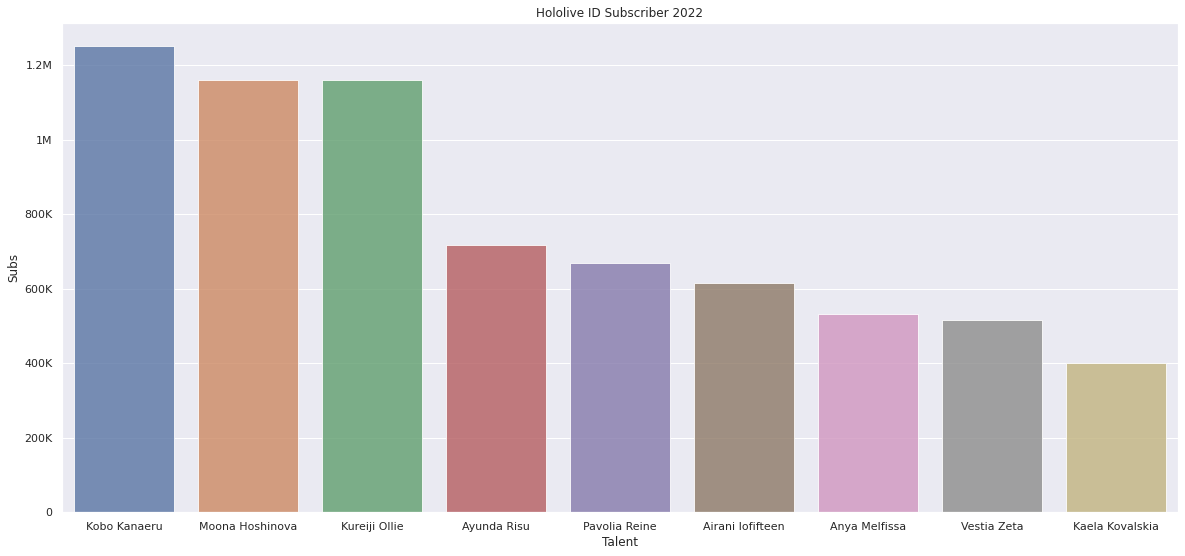

In [15]:
create_plot_bar(sort_holo_id, "Hololive ID")

### Create Scatter Plot to check correlation between two variables 

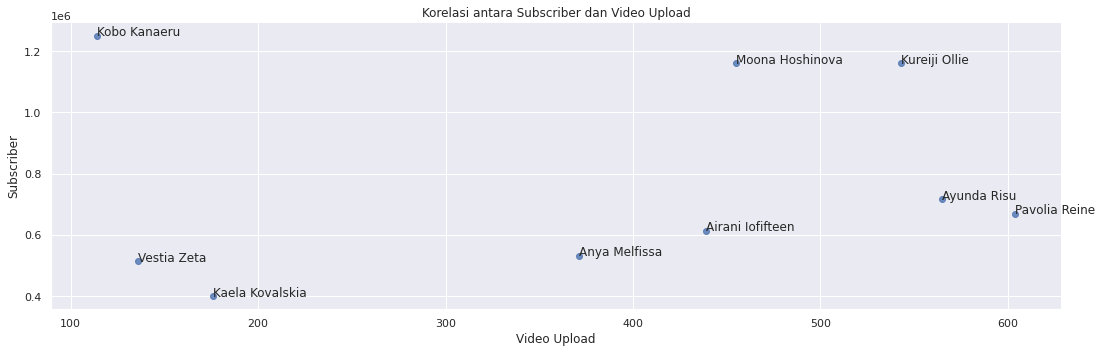

In [16]:
create_scatter_plot(sort_holo_id)
label_point(sort_holo_id["videoCount"], sort_holo_id["subscriptionCount"], sort_holo_id["englishName"], plt.gca()) 

In [17]:
sc_stats = pd.read_csv(DATA_PATH + "superchat_stats.csv")

In [18]:
sc_stats.head()

,channelId,period,superChats,uniqueSuperChatters,totalSC,averageSC,totalMessageLength,averageMessageLength,mostFrequentCurrency,mostFrequentColor
0,UCFKOVgVbGmX65RxO3EtH3iw,2021-03,5552,1043,3482098,627,182687,35,JPY,green
1,UCV5ZZlLjk5MKGg3L0n0vbzw,2021-03,220,121,199004,904,5747,29,JPY,green
2,UCvaTdHTWBGv3MKj3KVqJVCw,2021-03,2653,796,1576726,594,64393,26,JPY,green
3,UCNVEsYbiZjH5QLmGeSgTSzg,2021-03,166,124,205611,1238,4853,35,USD,green
4,UCl_gCybOJRIgOXw6Qb4qJzQ,2021-03,3468,835,3773715,1088,110789,34,JPY,green


As we can see, di Super Chat itu terdapat semacam tierlist. 

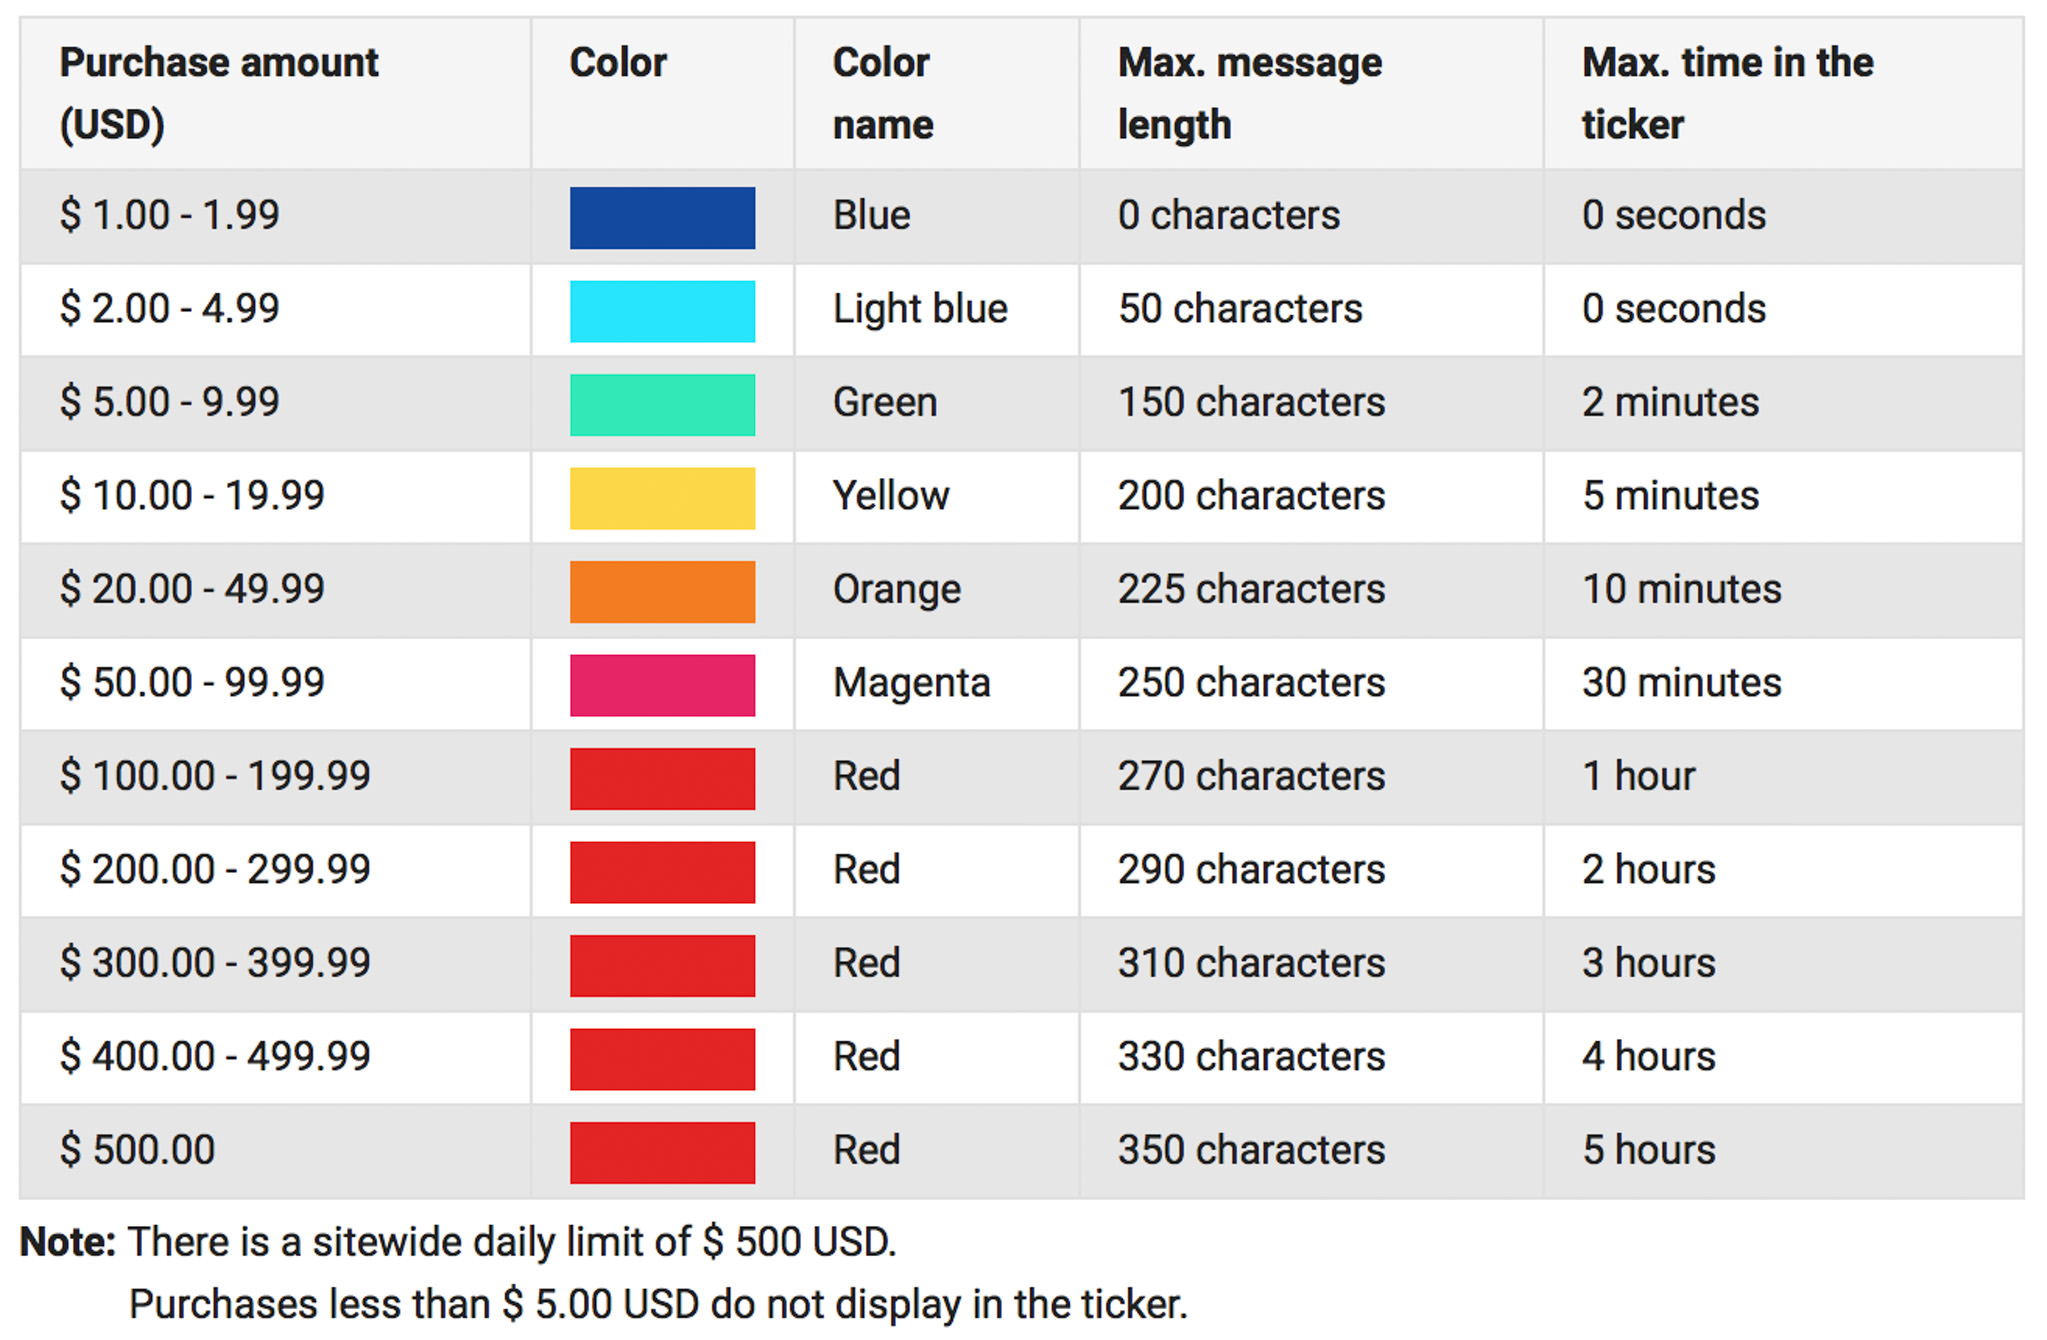

Convert `period` jadi datetime dan convert `totalSC` dari JPY ke IDR

26 October 2022 saat notebook ini dibuat konversi 1 Japanese Yen = Rp 105.85

In [19]:
sc_holo_id = pd.merge(sort_holo_id, sc_stats)

In [20]:
kobo_sc = sc_holo_id[sc_holo_id["englishName"] == "Kobo Kanaeru"]

In [21]:
COLS = ["englishName", "affiliation", "subscriptionCount", "period",
       "uniqueSuperChatters", "totalSC", "averageSC"]

In [22]:
kobo_sc = kobo_sc[COLS]

In [23]:
kobo_sc

,englishName,affiliation,subscriptionCount,period,uniqueSuperChatters,totalSC,averageSC
0,Kobo Kanaeru,Hololive,1250000,2022-04,318,506966,906
1,Kobo Kanaeru,Hololive,1250000,2022-05,356,590642,592
2,Kobo Kanaeru,Hololive,1250000,2022-06,583,537163,435
3,Kobo Kanaeru,Hololive,1250000,2022-07,1026,1117361,540


In [24]:
kobo_sc["totalSC_IDR"] = kobo_sc["totalSC"] * 105.85
kobo_sc["averageSC_IDR"] = kobo_sc["averageSC"] * 105.85

In [25]:
kobo_sc

,englishName,affiliation,subscriptionCount,period,uniqueSuperChatters,totalSC,averageSC,totalSC_IDR,averageSC_IDR
0,Kobo Kanaeru,Hololive,1250000,2022-04,318,506966,906,53662351.100,95900.100
1,Kobo Kanaeru,Hololive,1250000,2022-05,356,590642,592,62519455.700,62663.200
2,Kobo Kanaeru,Hololive,1250000,2022-06,583,537163,435,56858703.550,46044.750
3,Kobo Kanaeru,Hololive,1250000,2022-07,1026,1117361,540,118272661.850,57159.000


asu, itu cuma SC belum platform lain wkwkw.

kalo dari hololive akan ngepotong sekian persen

https://github.com/YUKI2eN3e/HoloLive-SuperChat-Calc

In [26]:
kobo_sc["totalSC_IDR_clean"] = (kobo_sc["totalSC_IDR"] - (kobo_sc["totalSC_IDR"] * 0.3)) / 2

In [27]:
kobo_sc

,englishName,affiliation,subscriptionCount,period,uniqueSuperChatters,totalSC,averageSC,totalSC_IDR,averageSC_IDR,totalSC_IDR_clean
0,Kobo Kanaeru,Hololive,1250000,2022-04,318,506966,906,53662351.100,95900.100,18781822.885
1,Kobo Kanaeru,Hololive,1250000,2022-05,356,590642,592,62519455.700,62663.200,21881809.495
2,Kobo Kanaeru,Hololive,1250000,2022-06,583,537163,435,56858703.550,46044.750,19900546.242
3,Kobo Kanaeru,Hololive,1250000,2022-07,1026,1117361,540,118272661.850,57159.000,41395431.647


In [28]:
kobo_sc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4 entries, 0 to 3
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   englishName          4 non-null      object 
 1   affiliation          4 non-null      object 
 2   subscriptionCount    4 non-null      int64  
 3   period               4 non-null      object 
 4   uniqueSuperChatters  4 non-null      int64  
 5   totalSC              4 non-null      int64  
 6   averageSC            4 non-null      int64  
 7   totalSC_IDR          4 non-null      float64
 8   averageSC_IDR        4 non-null      float64
 9   totalSC_IDR_clean    4 non-null      float64
dtypes: float64(3), int64(4), object(3)
memory usage: 352.0+ bytes


In [29]:
kobo_sc['period'] = kobo_sc['period'].apply(pd.to_datetime)
kobo_sc['month'] = kobo_sc['period'].dt.month

In [30]:
kobo_sc

,englishName,affiliation,subscriptionCount,period,uniqueSuperChatters,totalSC,averageSC,totalSC_IDR,averageSC_IDR,totalSC_IDR_clean,month
0,Kobo Kanaeru,Hololive,1250000,2022-04-01,318,506966,906,53662351.100,95900.100,18781822.885,4
1,Kobo Kanaeru,Hololive,1250000,2022-05-01,356,590642,592,62519455.700,62663.200,21881809.495,5
2,Kobo Kanaeru,Hololive,1250000,2022-06-01,583,537163,435,56858703.550,46044.750,19900546.242,6
3,Kobo Kanaeru,Hololive,1250000,2022-07-01,1026,1117361,540,118272661.850,57159.000,41395431.647,7


Text(0.5, 0, 'Month')

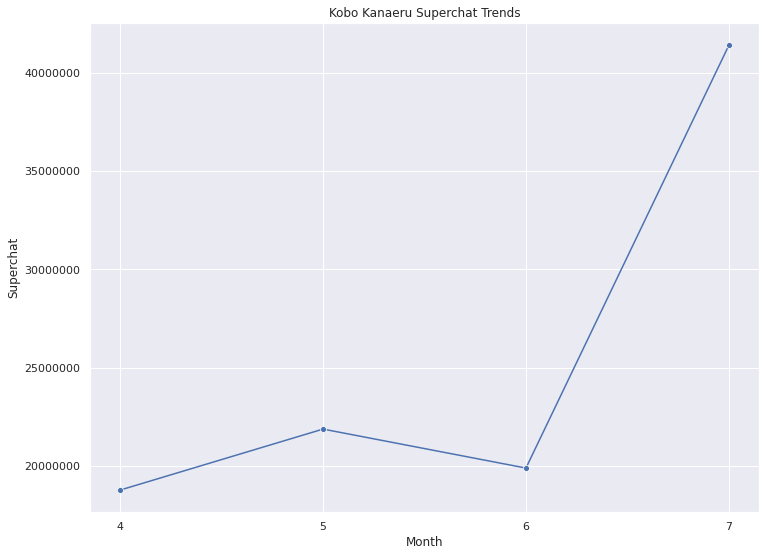

In [31]:
plt.figure(figsize=(12,9))

plt.ticklabel_format(style='plain', axis='y')
plt.xticks(np.arange(min(kobo_sc['month']), max(kobo_sc['month'])+1, 1.0))
sns.lineplot('month', 'totalSC_IDR_clean', data=kobo_sc, marker='o')
plt.title('Kobo Kanaeru Superchat Trends')
plt.ylabel("Superchat")
plt.xlabel("Month")

Apakah banting setir menjadi vtuber aja?

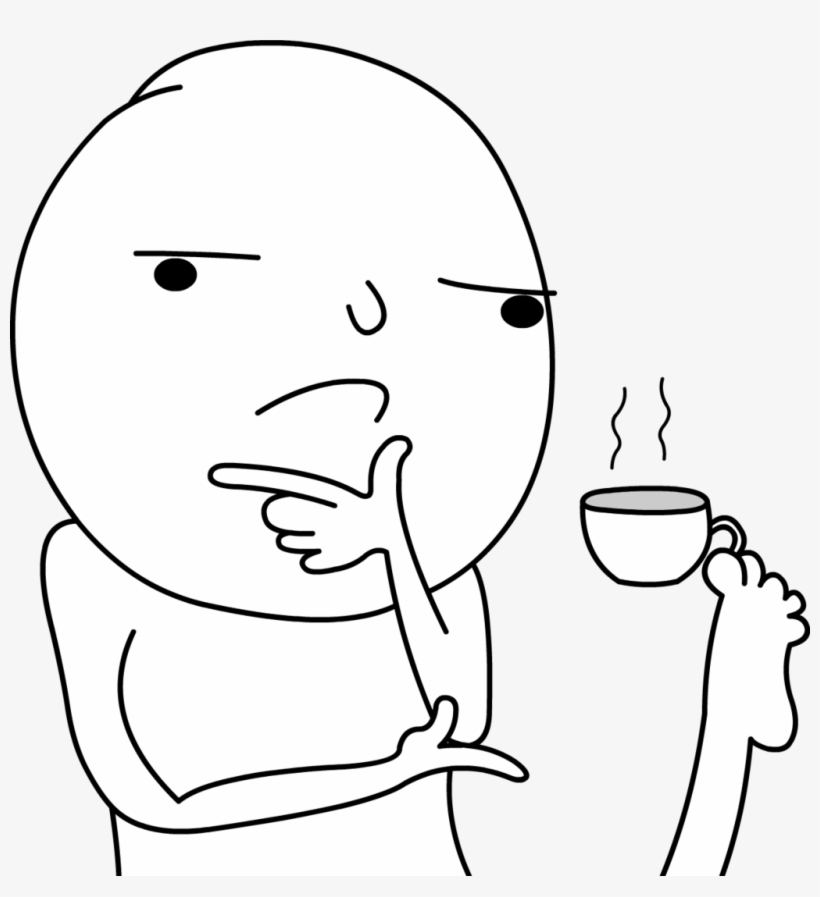